In [1]:
import random
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from random import choice


In [2]:
def problem(N, seed=None):
    random.seed(seed)
    return list(sorted({
        tuple(set(random.randint(0, N - 1) for n in range(random.randint(N // 5, N // 2))))
        for n in range(random.randint(N, N * 5))})
    )

In [3]:
Individual= namedtuple('Individual',['genome','fitTuple']) 

def fitness_function(genome: list):
    '''Returns a tuple (number_of_covered_elements, -weigth)'''
    #this fitness function allows the precence of not optimal solution. The hierarchy of them shold be based at first of the #ofCoverdEl and then on the lighter
    num_covered_elements = set()
    weigth = 0
    for (i, list_) in enumerate(ALL_LISTS):
        if genome[i]:
            num_covered_elements.update(list_)
            weigth += len(list_)
    
    return len(num_covered_elements), -weigth #the reason why weight is negative is we want to minimize it

In [4]:

def tournament(population, tournament_size=2):
    return max(random.choices(population, k=tournament_size), key=lambda i: i.fitTuple)


def cross_over(g1, g2):
    cut = random.randint(0, len(ALL_LISTS)-1)
    choice=random.randint(0,2)
    if choice==0:
        return g1[:cut] + g2[cut:]
    else:
        return g2[:cut] + g1[cut:]


def mutation(g):
    point = random.randint(0, len(ALL_LISTS) - 1)
    return g[:point] + (1 - g[point],) + g[point + 1 :]

def multiple_mutation(g):
    '''using multiple it's worse, because mutation should be small'''
    nflips=random.randint(1,100)
    for _ in range(nflips):
        g=mutation(g)
    return g

def vacuum_cleaner(g):
    '''takes some weight off by switching off a list'''
    temp_g=g
    for _ in range (random.randint(0,len(ALL_LISTS))):
        point=random.randint(0, len(ALL_LISTS) - 1)
        if temp_g[point] == 1:
            temp_g= temp_g[:point] + (0,) + temp_g[point + 1 :]
    return temp_g
    

def deClonizator(population):
    '''returns a population without duplicates'''
    unique_population=list()
    for individual in population:
        if individual not in unique_population:
            unique_population.append(individual)
    return unique_population




In [5]:

def GA(population, NUM_GENERATIONS, OFFSPRING_SIZE, mutation_rate,POPULATION_SIZE,cleaner_rate):
    start = time.time()                 #to take note of the computation time
    fittestIndividual=copy(population[0])
    for g in range(NUM_GENERATIONS):
        offspring = list()
        for i in range(OFFSPRING_SIZE): #generation of the offSprings
            if random.random() < 0.5:
                p = tournament(population)
                if g<NUM_GENERATIONS/cleaner_rate:
                    o= vacuum_cleaner(p.genome)
                else:
                    o = mutation(p.genome)
                #o = mutation(p.genome)
                   
            else:
                p1 = tournament(population)
                p2 = tournament(population)
                o = cross_over(p1.genome, p2.genome)
            offspring.append(Individual(o, fitness_function(o)))
        population += offspring  #offspring added to the population
        
        #population=deClonizator(population)
        population=list(dict.fromkeys(population))  #deletion of duplicates
        

        population = sorted(population, key=lambda i: i.fitTuple, reverse=True)[:POPULATION_SIZE]  #cut the population to the original size
        if(population[0].fitTuple>fittestIndividual.fitTuple):  #copy the fittest individual
            fittestIndividual=copy(population[0])
    end = time.time()
    delta=format(end-start, '.2f')
    fitCall=NUM_GENERATIONS*OFFSPRING_SIZE #take note of #ofFitnessFunctionCall
    #print( "time: " + str(delta)+ " fit call " + str(fitCall))
    print( "time: " + str(delta) + " fittest: " + str(fittestIndividual.fitTuple))
    return fittestIndividual


In [10]:
def GAstrategy2(population, NUM_GENERATIONS, OFFSPRING_SIZE, mutation_rate,POPULATION_SIZE,cleaner_rate):
    start = time.time()                 #to take note of the computation time
    fittestIndividual=copy(population[0])
    for g in range(NUM_GENERATIONS):
        offspring = list()
        for i in range(OFFSPRING_SIZE):
            o=0
            if random.random() < 0.5:
                p = tournament(population)
                if g<NUM_GENERATIONS/cleaner_rate:
                    o= vacuum_cleaner(p.genome)
                else:
                    o = mutation(p.genome)
            if random.random() < 0.5:
                p1 = tournament(population)
                p2 = tournament(population)
                o = cross_over(p1.genome, p2.genome)
            if o:                
                population.append(Individual(o, fitness_function(o)))
                population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
                del population[-1] 
            #in the strategy2 the population is cut every time we add a new individual
        
        #population=deClonizator(population)
        population=list(dict.fromkeys(population))  #deletion of duplicates

        if(population[0].fitTuple>fittestIndividual.fitTuple):
            fittestIndividual=copy(population[0])
    end = time.time()
    delta=format(end-start, '.2f')
    fitCall=NUM_GENERATIONS*OFFSPRING_SIZE #take note of #ofFitnessFunctionCall
    #print( "time: " + str(delta)+ " fit call " + str(fitCall))
    print( "time: " + str(delta) + " fittest: " + str(fittestIndividual.fitTuple))
    return fittestIndividual


##Vary the population size

time: 0.96 fittest: (100, -245)
time: 0.94 fittest: (100, -208)
time: 0.93 fittest: (100, -222)
time: 0.96 fittest: (100, -187)
time: 1.03 fittest: (100, -197)
time: 1.16 fittest: (100, -205)
time: 1.40 fittest: (100, -201)


Text(0, 0.5, 'y - fittest')

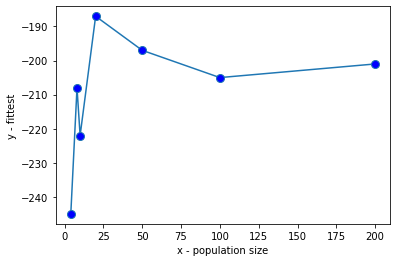

In [130]:
population_SIZE=[4,8,10,20,50,100,200]
PROBLEM_SIZE=100
OFFSPRING_SIZE=20
mutation_rate=0.5
cleaner_rate=20
NUM_GENERATIONS=1000
N=3
ALL_LISTS=problem(PROBLEM_SIZE,42)
fittest=list()
i=0
for pop_size in population_SIZE:
    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(pop_size)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    fittest_ind=GA(population,NUM_GENERATIONS,OFFSPRING_SIZE,mutation_rate,pop_size,cleaner_rate)
    fittest.append(fittest_ind.fitTuple[1])
plt.plot(population_SIZE,fittest, marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('x - population size')
# naming the y axis
plt.ylabel('y - fittest')


##Vary the offspring size

time: 0.25 fittest: (100, -262)
time: 0.52 fittest: (100, -228)
time: 0.98 fittest: (100, -197)
time: 1.88 fittest: (100, -223)
time: 2.37 fittest: (100, -221)


Text(0, 0.5, 'y - fittest')

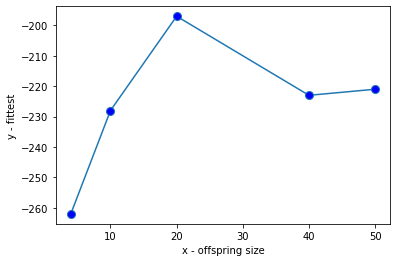

In [131]:
population_SIZE=20
PROBLEM_SIZE=100
OFFSPRING_SIZE=[4,10,20,40,50]
mutation_rate=0.5
cleaner_rate=20
NUM_GENERATIONS=1000
N=3
ALL_LISTS=problem(PROBLEM_SIZE,42)
fittest=list()
i=0
for off_size in OFFSPRING_SIZE:
    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    fittest_ind=GA(population,NUM_GENERATIONS,off_size,mutation_rate,population_SIZE,cleaner_rate)
    fittest.append(fittest_ind.fitTuple[1])
plt.plot(OFFSPRING_SIZE,fittest, marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('x - offspring size')
# naming the y axis
plt.ylabel('y - fittest')


##Vary the mutation rate

time: 0.99 fittest: (100, -227)
time: 0.97 fittest: (100, -218)
time: 0.96 fittest: (100, -242)
time: 0.96 fittest: (100, -225)
time: 0.96 fittest: (100, -225)


Text(0, 0.5, 'y - fittest')

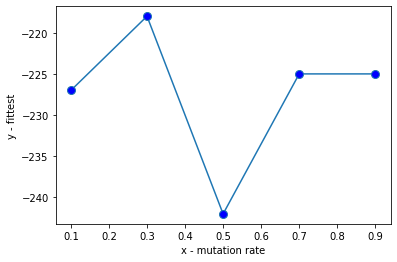

In [132]:
population_SIZE=20
PROBLEM_SIZE=100
OFFSPRING_SIZE=20
mutation_rate=[0.1,0.3,0.5,0.7,0.9]
cleaner_rate=20
NUM_GENERATIONS=1000
ALL_LISTS=problem(PROBLEM_SIZE,42)
fittest=list()
i=0
for mut in mutation_rate:
    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    fittest_ind=GA(population,NUM_GENERATIONS,OFFSPRING_SIZE,mut,population_SIZE,cleaner_rate)
    fittest.append(fittest_ind.fitTuple[1])
plt.plot(mutation_rate,fittest, marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('x - mutation rate')
# naming the y axis
plt.ylabel('y - fittest')


##Vary the cleaner rate

time: 47.74 fittest: (500, -1480)
time: 43.75 fittest: (500, -1576)
time: 40.68 fittest: (500, -1598)
time: 41.44 fittest: (500, -1628)
time: 40.22 fittest: (500, -1570)
time: 40.35 fittest: (500, -1542)


Text(0, 0.5, 'y - fittest')

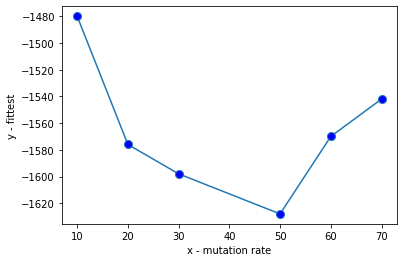

In [133]:
population_SIZE=20
PROBLEM_SIZE=500
OFFSPRING_SIZE=20
mutation_rate=0.3
cleaner_rate=[10,20,30,50,60,70]
NUM_GENERATIONS=10000
ALL_LISTS=problem(PROBLEM_SIZE,42)
fittest=list()
i=0
for clean_ in cleaner_rate:
    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    fittest_ind=GA(population,NUM_GENERATIONS,OFFSPRING_SIZE,mutation_rate,population_SIZE,clean_)
    fittest.append(fittest_ind.fitTuple[1])
plt.plot(cleaner_rate,fittest, marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('x - mutation rate')
# naming the y axis
plt.ylabel('y - fittest')

##Final trial

To let the computation be feasible have been chosen small but decent value of population and offspring size instead of the best ones 

time: 107.20 fittest: (5000, -24806)
time: 291.85 fittest: (10000, -55340)


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

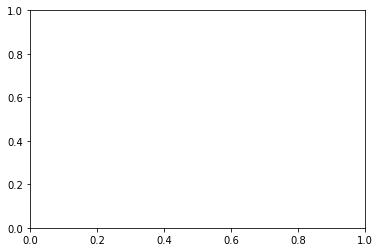

In [13]:
population_SIZE=20
PROBLEM_SIZE=[5,10,20,100,500,1000,2000]
PROBLEM_SIZE_=[5000,10000]
OFFSPRING_SIZE=20
mutation_rate=0.3
cleaner_rate=10
NUM_GENERATIONS=1000
i=0
for prbl_size in PROBLEM_SIZE:
    ALL_LISTS=problem(prbl_size,42)
    fittest=list()

    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    fittest_ind=GA(population,NUM_GENERATIONS,OFFSPRING_SIZE,mutation_rate,population_SIZE,cleaner_rate)
    fittest.append(fittest_ind.fitTuple[1])
plt.plot(PROBLEM_SIZE,fittest, marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('x - problem size')
# naming the y axis
plt.ylabel('y - fittest')


##Strategy2

time: 0.14 fittest: (5, -5)
time: 0.19 fittest: (10, -14)
time: 0.19 fittest: (20, -35)
time: 0.93 fittest: (100, -257)
time: 3.81 fittest: (500, -1908)
time: 8.92 fittest: (1000, -4354)
time: 21.82 fittest: (2000, -9560)


ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

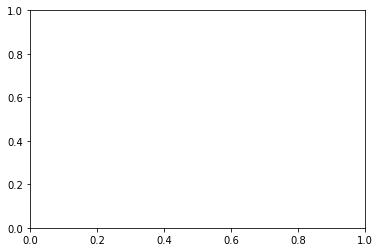

In [11]:
population_SIZE=20
PROBLEM_SIZE=[5,10,20,100,500,1000,2000]
OFFSPRING_SIZE=20
mutation_rate=0.3
cleaner_rate=10
NUM_GENERATIONS=1000
i=0
for prbl_size in PROBLEM_SIZE:
    ALL_LISTS=problem(prbl_size,42)
    fittest=list()

    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    fittest_ind=GAstrategy2(population,NUM_GENERATIONS,OFFSPRING_SIZE,mutation_rate,population_SIZE,cleaner_rate)
    fittest.append(fittest_ind.fitTuple[1])
plt.plot(PROBLEM_SIZE,fittest, marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('x - problem size')
# naming the y axis
plt.ylabel('y - fittest')
